# Predicting House Prices with Linear Regression

## Problem Statement



We are a team of data scientist working for (Real Estate Success Inc) that is in the residential home flipping business. Our goal is to utilise the housing data collected from 2006 to 2010 to build a Linear Regression model that best predicts the potential sale price for properties located in Ames, Iowa. Once we are able to accurately predicting the housing prices, we can better identify houses that are undervalued and the features to focus on renovation/repair works.

## Executive Summary
This Ames Housing Data is provided to describe the properties in Ames, lowa that were sold between the years 2006-2010. First step, we will need to do a data cleaning, the missing values were fixed and data types were corrected. Once the data was cleaned, Exploratory Data Analysis (EDA) was performed to explore the relationship between Sale Price and each feature. For numeric features, heatmap and correlation coefficients were used to examine whether is there a linear relationship. For categorical data, bar plots were developed to show the average sale price across categories. During EDA for categorical features, look out for clusters in Sale Prices that emerged.

After the EDA, features were handled to reduce dimensionality of the data and to account for the clusters that emerged during the EDA. If a categorical variable was coded during feature engineering, it was removed from the data frame. Categorical variable was removed from the data frame if it was coded during feature engineering. Any categorical variables of interest were dummified. In order to prepare for modelling, the data was divided into training sets (80% of data) and testing sets (20% of data). (NOTE: Four models were created for this project, this includes Ridge Regression, Lasso Regression, and Linear Regression. For the regression models with regularization techniques, dummy variables were created for all categorical variables that were not been coded. For the last Linear Regression, dummy variables were hand-picked based on EDA and the Lasso Regression as different sets of dummy variables were included in the models.)

Four models were built during the modelling stage: a Linear Regression with 337 features, Ridge Regression with 337 features, Lasso Regression with 20 features, and Linear Regression with 47 features. All the features included in the last Linear Regression Model were essential based on EDA or the Lasso regression. The four models were compared based on R2 score. After comparison, the highest scoring model was being selected for further evaluation using RMSE and residuals plots. 

Conclusions and recommendations were made based on the best-performing model.

 

## Table of Contents
1. [Imports](#Imports)


2. [Read-in Data](#Read-in-Data)


3. [Data Cleaning](#Data-Cleaning)  
    - [Shape](#Check-Shape)  
    - [Cleaning Functions](#Cleaning-Functions)
    - [Missing Values](#Check-for-Null/Missing-Values)
    - [Data Types](#Check-for-Data-Types)
    - [Unsual Values](#Check-for-Unusual-Values)
    - [Clean Data](#Export-Clean-Data)  


4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Graphing Functions](#Graphing-Functions)
    - [Correlations with Target](#Heatmap-and-Correlations-for-Target)
    - [Distributions](#Distributions-of-Variables)
    - [Categorical Variables and Target](#Visualizing-Relationships-between-Categorical-Features-and-Sales-Price)


5. [Feature Engineering](#Feature-Engineering)
    - [Combine Train + Test Data](#Combine-Train-+-Test-Datasets-to-Ensure-Equal-Features-in-Train/Test-Datasets)
    - [Functions](#Functions)
    - [Features](#Create-Features)
    - [Split Train and Test Data](#Divide-Data-Back-into-Preprocessed-Train-and-Test-Sets)


6. [Model Preparation](#Model-Preparation)
    - [Ridge and Lasso Regression](#Models-1-3:-Overfit-Linear-Regression,-Ridge,-and-Lasso-Regression)
    - [Linear Regression](#Model-3:-Linear-Regression-Using-Handpicked-Features-Identified-by-EDA-and-Lasso)


7. [Modeling](#Modeling)
    - [Overfit Linear Regression](#Model-1:-Linear-Regression-(As-Precursor-to-Ridge-and-Lasso))
    - [RidgeCV Regression](#Model-2:-RidgeCV-Regression)
    - [LassoCV Regression](#Model-3:-LassoCV-Regression)
    - [Linear Regression](#Model-4:-Linear-Regression-with-Features-Identified-in-EDA-and-Lasso)
    

8. [Model Selection](#Model-Selection)


9. [Model Evaluation](#Model-Evaluation)


10. [Conclusions and Recommendations](#Conclusions-and-Recommendations)


11. [References](#References)    

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Choose our data

### These are 3 datasets included in the [`data`](./datasets/) folder for this project.

* ['sample_sub_reg.csv'](./datasets/sample_sub_reg.csv): sample_sub_reg
* ['test.csv'](./datasets/test.csv): test
* ['train.csv'](./datasets/train.csv): train

# Read-in Data

#### Train Data

In [2]:
train = pd.read_csv('./datasets/train.csv')
pd.set_option('display.max_columns', None)

#### Test Data

In [3]:
test = pd.read_csv('./datasets/test.csv')
pd.set_option('display.max_columns', None)


## Data Cleaning

Both train and test datasets will need to be clean simultaneously.

### Check Shape

In [4]:
train.shape

(2051, 81)

In [5]:
test.shape 

(878, 80)

### Cleaning Functions

The functions used to clean the data are listed below.

In [6]:
def check_for_nulls(df):
    '''
    Iterates over columns in the data set
    Creates a list of columns with missing values
    '''
    missing_list = []

    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)

    return missing_list

In [7]:
def show_na_sum(df, column):
    '''
    Shows a count of missing values in a specific column
    '''
    return df[column].isna().sum()

In [8]:
def fix_na(df, column, value):
    '''
    Fill missing data points with a specific function
    '''
    df[column] = df[column].fillna(value)

In [9]:
def change_dtype(df, column, map_fxn):
    '''
    Convert a column to a new data type
    '''
    df[column] = df[column].map(map_fxn)

### Check for Null/Missing Values

#### Generate a List of Null Values for the Train and Test Sets

In [10]:
# Train
check_for_nulls(train)

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [11]:
# Test
check_for_nulls(test)

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Electrical',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

Above are the names for the columns that contain missing data for train and test. All these missing values will be cleaned below.

#### Lot Frontage

In [12]:
show_na_sum(train, 'Lot Frontage')

330

In [13]:
train[train['Lot Frontage'].isna()]['MS Zoning'].value_counts()

RL    289
RM     25
FV     13
RH      3
Name: MS Zoning, dtype: int64

In [14]:
# Clean Train Data
fix_na(train, 'Lot Frontage', train['Lot Frontage'].mean())

In [15]:
# Clean Test Data
fix_na(test, 'Lot Frontage', test['Lot Frontage'].mean())

#### Alley

In [16]:
show_na_sum(train, 'Alley')

1911

In [17]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [18]:
# Fix Train Data
fix_na(train, 'Alley', 'NA')

In [19]:
# Fix Test Data
fix_na(test, 'Alley', 'NA')

#### Masonry Veneer Type (Mas Vnr Type)

In [20]:
show_na_sum(train, 'Mas Vnr Type')

22

In [21]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [22]:
# Fix Train Data
fix_na(train, 'Mas Vnr Type', 'None')

In [23]:
# Fix Test Data
fix_na(train, 'Mas Vnr Type', 'None')

#### Masonry Veneer Area (Mas Vnr Area)

In [24]:
show_na_sum(train, 'Mas Vnr Area')

22

In [25]:
train[train['Mas Vnr Type'] == 'None']['Mas Vnr Area']

2       0.0
3       0.0
4       0.0
5       0.0
8       0.0
       ... 
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
Name: Mas Vnr Area, Length: 1240, dtype: float64

In [26]:
# Fix Train Data
fix_na(train, 'Mas Vnr Area', 0)

In [27]:
# Fix Test Data
fix_na(test, 'Mas Vnr Area', 0)

#### Basement Quality (Bsmt Qual)

In [28]:
show_na_sum(train, 'Bsmt Qual')

55

In [29]:
train['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [30]:
# Fix Train Data
fix_na(train, 'Bsmt Qual', 'NA')

In [31]:
# Fix Test Data
fix_na(test, 'Bsmt Qual', 'NA')

#### Basement Condition (Bsmt Cond)

In [32]:
show_na_sum(train, 'Bsmt Cond')

55

In [33]:
train['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [34]:
# Fix Train Data
fix_na(train, 'Bsmt Cond', 'NA')

In [35]:
# Fix Test Data
fix_na(test, 'Bsmt Cond', 'NA')

#### Bsmt Exposure

In [36]:
show_na_sum(train, 'Bsmt Exposure')

58

In [37]:
train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [38]:
# Fix Train Data
fix_na(train, 'Bsmt Exposure', 'NA')

In [39]:
# Fix Test Data
fix_na(test, 'Bsmt Exposure', 'NA')

#### Quality of Basement Finished Area 1 (BsmtFin Type 1)

In [40]:
show_na_sum(train, 'BsmtFin Type 1')

55

In [41]:
train['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [42]:
# Fix Train Data
fix_na(train, 'BsmtFin Type 1', 'NA')

In [43]:
# Fix Test Data
fix_na(test, 'BsmtFin Type 1', 'NA')

#### Quality of Basement Finished Area 2 (BsmtFin Type 2)

In [44]:
show_na_sum(train, 'BsmtFin Type 2')

56

In [45]:
train['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [46]:
# Fix Train Data
fix_na(train, 'BsmtFin Type 2', 'NA')

In [47]:
# Fix Test Data
fix_na(test, 'BsmtFin Type 2', 'NA')

#### Fireplace Quality (Fireplace Qu)

In [48]:
show_na_sum(train, 'Fireplace Qu')

1000

In [49]:
train[train['Fireplaces']==0]['Fireplace Qu'].count()

0

In [50]:
# Fix Train Data
fix_na(train, 'Fireplace Qu', 'NA')

In [51]:
# Fix Test Data
fix_na(test, 'Fireplace Qu', 'NA')

#### Garage Type

In [52]:
show_na_sum(train, 'Garage Type')

113

In [53]:
train[train['Garage Area']==0]['Id'].count()

113

In [54]:
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [55]:
# Fix Train Data
fix_na(train, 'Garage Type', 'NA')

In [56]:
# Fix Test Data
fix_na(test, 'Garage Type', 'NA')

#### Garage Yr Built

In [57]:
show_na_sum(train, 'Garage Yr Blt')

114

In [58]:
mask1 = train['Garage Area'] != 0
mask2 = train['Garage Yr Blt'].isna()

train[mask1 & mask2]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [59]:
# Fix Train Data
fix_na(train, 'Garage Yr Blt', 'NA')

In [60]:
# Fix Test Data
fix_na(test, 'Garage Yr Blt', 'NA')

#### Garage Finish

In [61]:
show_na_sum(train, 'Garage Finish')

114

In [62]:
# Fix Test Data
fix_na(test, 'Garage Finish', 'NA')

#### Garage Quality (Garage Qual)

In [63]:
show_na_sum(train, 'Garage Qual')

114

In [64]:
# Fix Train Data
fix_na(train, 'Garage Qual', 'NA')

In [65]:
# Fix Test Data
fix_na(test, 'Garage Qual', 'NA')

#### Garage Condition (Garage Cond)

In [66]:
show_na_sum(train, 'Garage Cond')

114

In [67]:
# Fix Test Data
fix_na(test, 'Garage Cond', 'NA')

#### Pool QC

In [68]:
show_na_sum(train, 'Pool QC')

2042

In [69]:
train['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [70]:
train[train['Pool Area'] == 0]['Id'].count()

2042

In [71]:
train[train['Pool Area'] == 0].count()['Id']/train['Pool Area'].count()

0.9956118966357874

In [72]:
# Fix Train Data
fix_na(train, 'Pool QC', 'NA')

In [73]:
# Fix Test Data
fix_na(test, 'Pool QC', 'NA')

#### Fence

In [74]:
show_na_sum(train, 'Fence')

1651

In [75]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [76]:
# Fix Train Data
fix_na(train, 'Fence', 'NA')

In [77]:
# Fix Test Data
fix_na(test, 'Fence', 'NA')

#### Miscellanous Feature (Misc Feature)

In [78]:
show_na_sum(train, 'Misc Feature')

1986

In [79]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [80]:
# Fix Train Data
fix_na(train, 'Misc Feature', 'NA')

In [81]:
# Fix Test Data
fix_na(test, 'Misc Feature', 'NA')

#### Square Feet of Finished Basement 1 (Basmt Fin SF 1)

In [82]:
show_na_sum(train, 'BsmtFin SF 1')

1

In [83]:
train[train['BsmtFin SF 1'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [84]:
fix_na(train, 'BsmtFin SF 1', 0)

In [85]:
show_na_sum(train, 'BsmtFin SF 1')

0

#### Square Feet of Finished Basement 2 (BsmtFin SF 2)

In [86]:
show_na_sum(train, 'BsmtFin SF 2')

1

In [87]:
fix_na(train, 'BsmtFin SF 2', 0)

#### Square Feet of Unfinished Basement (BsmtUnfSF)

In [88]:
show_na_sum(train, 'Bsmt Unf SF')

1

In [89]:
fix_na(train, 'Bsmt Unf SF', 0)

#### Total Basement Square Feet (Total Bsmt SF)

In [90]:
show_na_sum(train, 'Total Bsmt SF')

1

In [91]:
fix_na(train, 'Total Bsmt SF', 0)

#### Remaining NaN Values

Because all of the missing values in the train data were for the same house, I have decided to fill NA by row.

In [92]:
train.loc[1327, :].fillna(0)

Id                   1342
PID             903230120
MS SubClass            20
MS Zoning              RM
Lot Frontage         99.0
                  ...    
Misc Val                0
Mo Sold                 4
Yr Sold              2008
Sale Type           ConLD
SalePrice           79000
Name: 1327, Length: 81, dtype: object

#### Electrical (Test Data Only)

In [93]:
show_na_sum(test, 'Electrical')

1

In [94]:
test[test['Electrical'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
634,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD


Because I did not want to explore the test data, I filled this missing value with the most common type of electrical.

In [95]:
fix_na(test, 'Electrical', 'SBrkr') # Fill with most common; Also standard optiono

#### Basement (Bsmt) Full Bath and Half Bath

In [96]:
train[train['Bsmt Full Bath'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [97]:
fix_na(train, 'Bsmt Full Bath', 0)

In [98]:
fix_na(train, 'Bsmt Half Bath', 0)

#### Garage Cars & Garage Area

In [99]:
show_na_sum(train, ['Garage Cars', 'Garage Area'])

Garage Cars    1
Garage Area    1
dtype: int64

In [100]:
train[train['Garage Cars'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NA,NaN,NaN,NaN,NA,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [101]:
fix_na(train, ['Garage Cars', 'Garage Area'], 0)

#### Check for Nulls #3

In [102]:
check_for_nulls(train)

['Garage Finish', 'Garage Cond']

All null values have been cleaned.

### Check for Data Types

In [103]:
# train.info()

#### Convert Int to String ('Id', 'PID', MS SubClass)

In [104]:
int_to_string = ['Id', 'PID', 'MS SubClass']

for item in int_to_string:
    change_dtype(train, item, str)

#### Convert Month Int to Month Name

In [105]:
months = {1: 'January',
         2: 'February',
         3: 'March',
         4: 'April',
         5: 'May',
         6: 'June',
         7: 'July',
         8: 'August',
         9: 'September',
         10: 'October',
         11: 'November',
         12: 'December'}

change_dtype(train, 'Mo Sold', months)

### Check for Unusual Values

#### Numerical Values

In [106]:
train.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,2007.775719,181469.701609
std,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129825.000000
50%,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,2010.000000,611657.000000


In [107]:
# We will need to investigate any values that seem out of the orinary

train[train['SalePrice'] == train['SalePrice'].min()] 


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1628,182,902207130,30,RM,68.0,9656,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NA,NA,NA,0,June,2010,WD,12789


#### Categorical Values

In [108]:
categorical_vars = train.select_dtypes(exclude = ['number'])

In [109]:
categorical_vars.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Mo Sold', 'Sale Type'],
      dtype='object')

Identified Concerns:
* Neighborhood: Greens (3), GrnHill (2), and Landmark (1) not listed as possible values in data dictionary.

### Export Clean Data

In [110]:
train.to_csv('./datasets/train_clean')

In [111]:
test.to_csv('./datasets/test_clean')

## Exploratory Data Analysis

### Graphing Functions

In [112]:
def create_scatter(df, x_col, y_col, title, x_label, y_label, marker_size = 4, color='lightcoral', plot_size = (10,6), hue = None):
    plt.figure(figsize=plot_size)
    ax = sns.scatterplot(x = x_col, y = y_col, data = df, s=marker_size, color=color, hue = hue)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;
    return ax

In [113]:
def create_hist(feature, num_bins, title, x_label, y_label, color='lightcoral', edgecolor='black', plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, edgecolor=edgecolor, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [114]:
def create_bar_xticks(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'lightcoral', plot_size = (10,6), lw = 1.5, x_tick_labels = None, palette = None):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black', palette = palette)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    ax.set_xticklabels(x_tick_labels)
    plt.tight_layout;

In [115]:
def create_bar(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'lightcoral', plot_size = (10,6), lw = 1.5):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [116]:
def create_count(df, x_col, title, x_label, color = 'lightcoral', plot_size = (10,6)):
    plt.figure(figsize = plot_size)
    sns.countplot(x=x_col, data = df, palette = 'viridis')
    plt.title(title, fontdict= {'fontsize':14})
    plt.xlabel(f'Number of {x_label} per Property', fontdict= {'fontsize':12})
    plt.ylabel('Number of Properties', fontdict= {'fontsize':12})

### Create a Date Frame with Proper Variable Names

In [117]:
vis_df = train.copy()

In [118]:
# Rename columns to be more readable for heatmap
vis_df.rename(columns = {
    'MS SubClass':'Building Class',
    'MS Zoning': 'Zoning Class',
    'Street' : 'Street Type',
    'Lot Config':'Lot Configuration',
    'Condition1': 'Proximity to Main Road or Railroad 1',
    'Condition 2' : 'Proximity to Main Road or Railroad 2',
    'BldgType':'Building Type',
    'Overall Qual': 'Overall Quality',
    'Overall Cond': 'Overall Condition',
    'Year Remod/Add': 'Remodel Date',
    'Roof Matl': 'Roof Material',
    'Exterior 1st':'Exterior Covering 1',
    'Exterior 2nd': 'Exterior Covering 2',
    'Mas Vnr Type': 'Masonry Veneer Type',
    'Mas Vnr Area': 'Masonry Veneer Area',
    'Exter Qual': 'Exterior Material Quality',
    'Exter Cond': 'Exterior Condition Quality',
    'Bsmt Qual':'Basement Quality',
    'Bsmt Cond': 'Basement Condition', 
    'Basmt Exposure': 'Basement Exposure',
    'BsmtFin Type 1': 'Quality of Finished Basement 1',
    'BsmtFin Type 2': 'Quality of Finished Basement 2',
    'BsmtFin SF 1': 'Square Feet of Finished Basement 1',
    'BsmtFin SF 2': 'Square Feet of Finished Basement 2',
    'Bsmt Unf SF': 'Square Feet of Unfinished Basement',
    'Total Bsmt SF': 'Total Basement Square Feet',
    'Heating': 'Heating Type',
    'Heating QC': 'Heating Quality and Condition',
    '1st Flr SF': '1st Floor Square Feet',
    '2nd Flr SF': '2nd Floor Square Feet',
    'Low Qual Fin SF':'Low Quality Finished Square Feet',
    'Gr Liv Area': 'Above-Grade Living Area',
    'Bsmt Full Bath': 'Basement Full Bathrooms',
    'Bsmt Half Bath': 'Basement Half Bathrooms',
    'Full Bath': 'Full Bathrooms',
    'Half Bath': 'Half Bathrooms',
    'Bedroom': 'Bedrooms',
    'Kitchen':'Kitchens',
    'Kitchen Qual': 'Kitchen Quality', 
    'TotRms AbvGrd': 'Total Rooms Above Grade',
    'Functional':'Functionality',
    'Fireplace Qu': 'Fireplace Quality',
    'Garage Yr Blt': "Year Garage Built",
    'Garage Finish': 'Interior Finish of Garage',
    'Garage Cars': 'Size of Garage (Cars)',
    'Garage Area': 'Size of Garage (Square Feet)',
    'Garage Qual':'Garage Quality',
    'Garage Cond': 'Garage Condition',
    'Paved Drive': 'Extent of Driveway Pavement', 
    'Wood Deck SF': 'Wood Deck Square Feet',
    'Open Porch SF': 'Open Porch Square Feet',
    'Enclosed Porch': 'Enclosed Porch Square Feet',
    '3Ssn Porch': '3 Season Porch Square Feet', 
    'Screen Porch': 'Screen Porch Square Feet',
    'Pool Area': 'Pool Area (Square Feet)',
    'Pool QC': 'Pool Quality',
    'Fence':'Fence Quality',
    'Misc Feature':'Miscellaneous Feature',
    'Misc Val': 'Value of Miscellaneous Feature',
    'Mo Sold': 'Month Sold',
    'Yr Sold': 'Year Sold',
    'SalePrice': 'Sale Price'
}, inplace = True);

### Heatmap and Correlations for Target

In [119]:
corr_matrix = vis_df.corr()[['Sale Price']].sort_values('Sale Price')

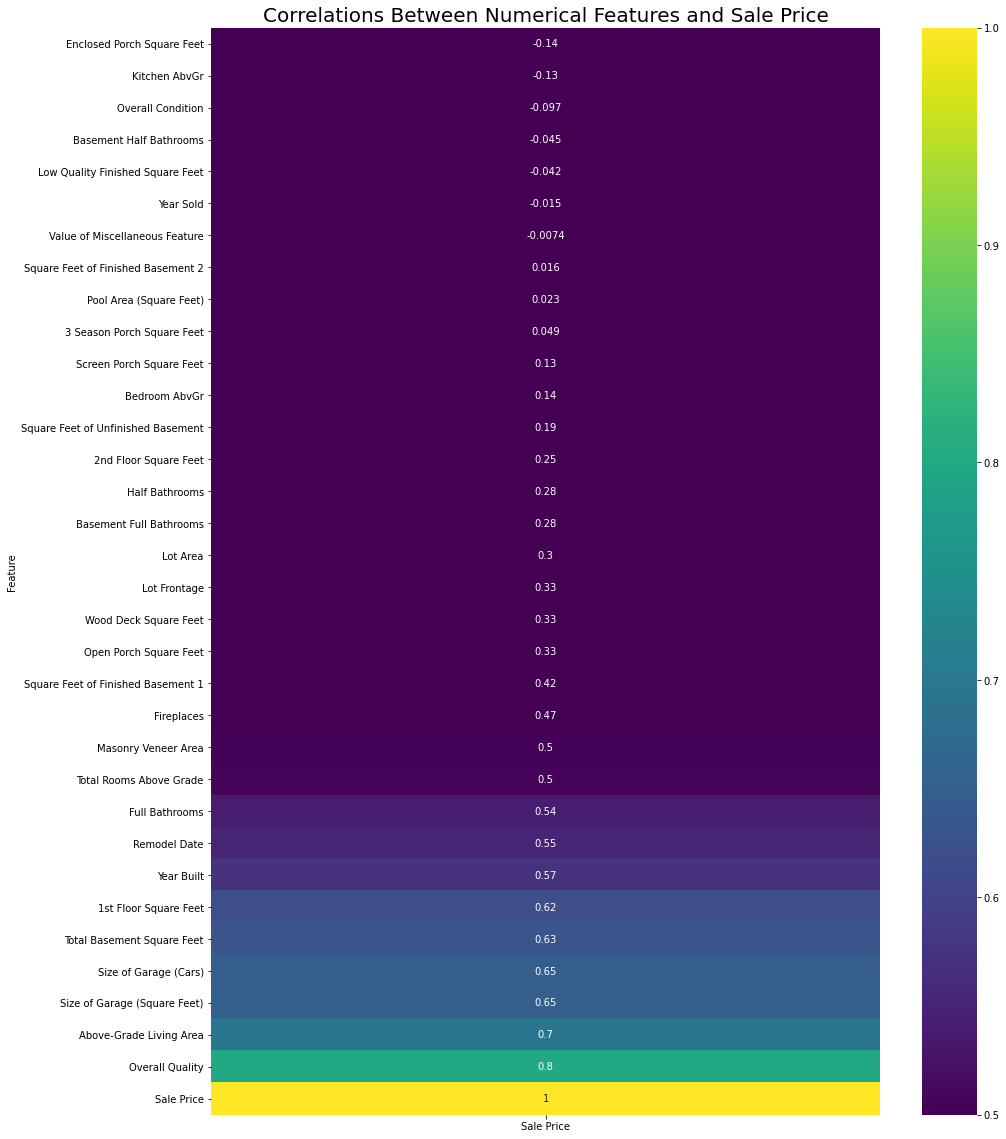

In [120]:
plt.figure(figsize=(15, 20))
sns.heatmap(corr_matrix, annot = True, vmin = 0.5, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':20})
plt.ylabel('Feature');

In [121]:
corr_target = abs(corr_matrix)
salient_num_features = corr_target.loc[corr_target['Sale Price'] > 0.5, :]
salient_num_features

,Sale Price
Masonry Veneer Area,0.503579
Total Rooms Above Grade,0.504014
Full Bathrooms,0.537969
Remodel Date,0.550370
Year Built,0.571849
1st Floor Square Feet,0.618486
Total Basement Square Feet,0.629303
Size of Garage (Cars),0.647781
Size of Garage (Square Feet),0.649897
Above-Grade Living Area,0.697038


Based on correlation results, we are able to see that 'Mas Vnr Area', 'Total Rooms Above Ground', 'Full Baths', 'Year of Remodeling or Additions', 'Year Built', '1st Floor Square', 'Total Basement Sq Footage', 'Number of Cars for the Garage', 'Garage Area', 'Above Grade Living Area', and 'Overall Quality' are the features most highly correlated with Sale Price.

### Distributions of Variables

#### Target (Sale Price)

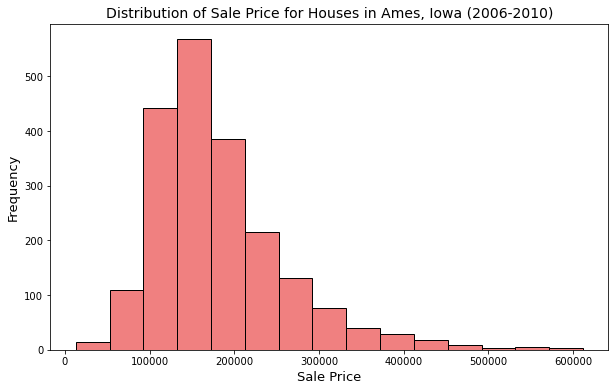

In [122]:
create_hist(train['SalePrice'], 
            num_bins = 15, 
            title = 'Distribution of Sale Price for Houses in Ames, Iowa (2006-2010)',
           x_label = 'Sale Price',
           y_label = 'Frequency')

The distribution for the target is not normally distributed. It is right skewed. 

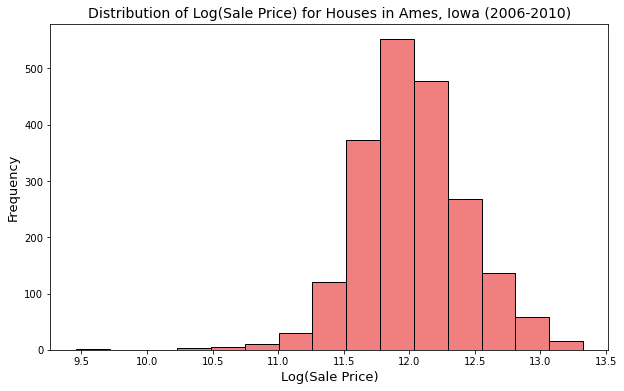

In [123]:
create_hist(np.log(train['SalePrice']), 
            num_bins = 15, 
            title = 'Distribution of Log(Sale Price) for Houses in Ames, Iowa (2006-2010)',
           x_label = 'Log(Sale Price)',
           y_label = 'Frequency')

Logging the distribution helps normalize the data a little, but now it is a slightly left skewed.

#### Features

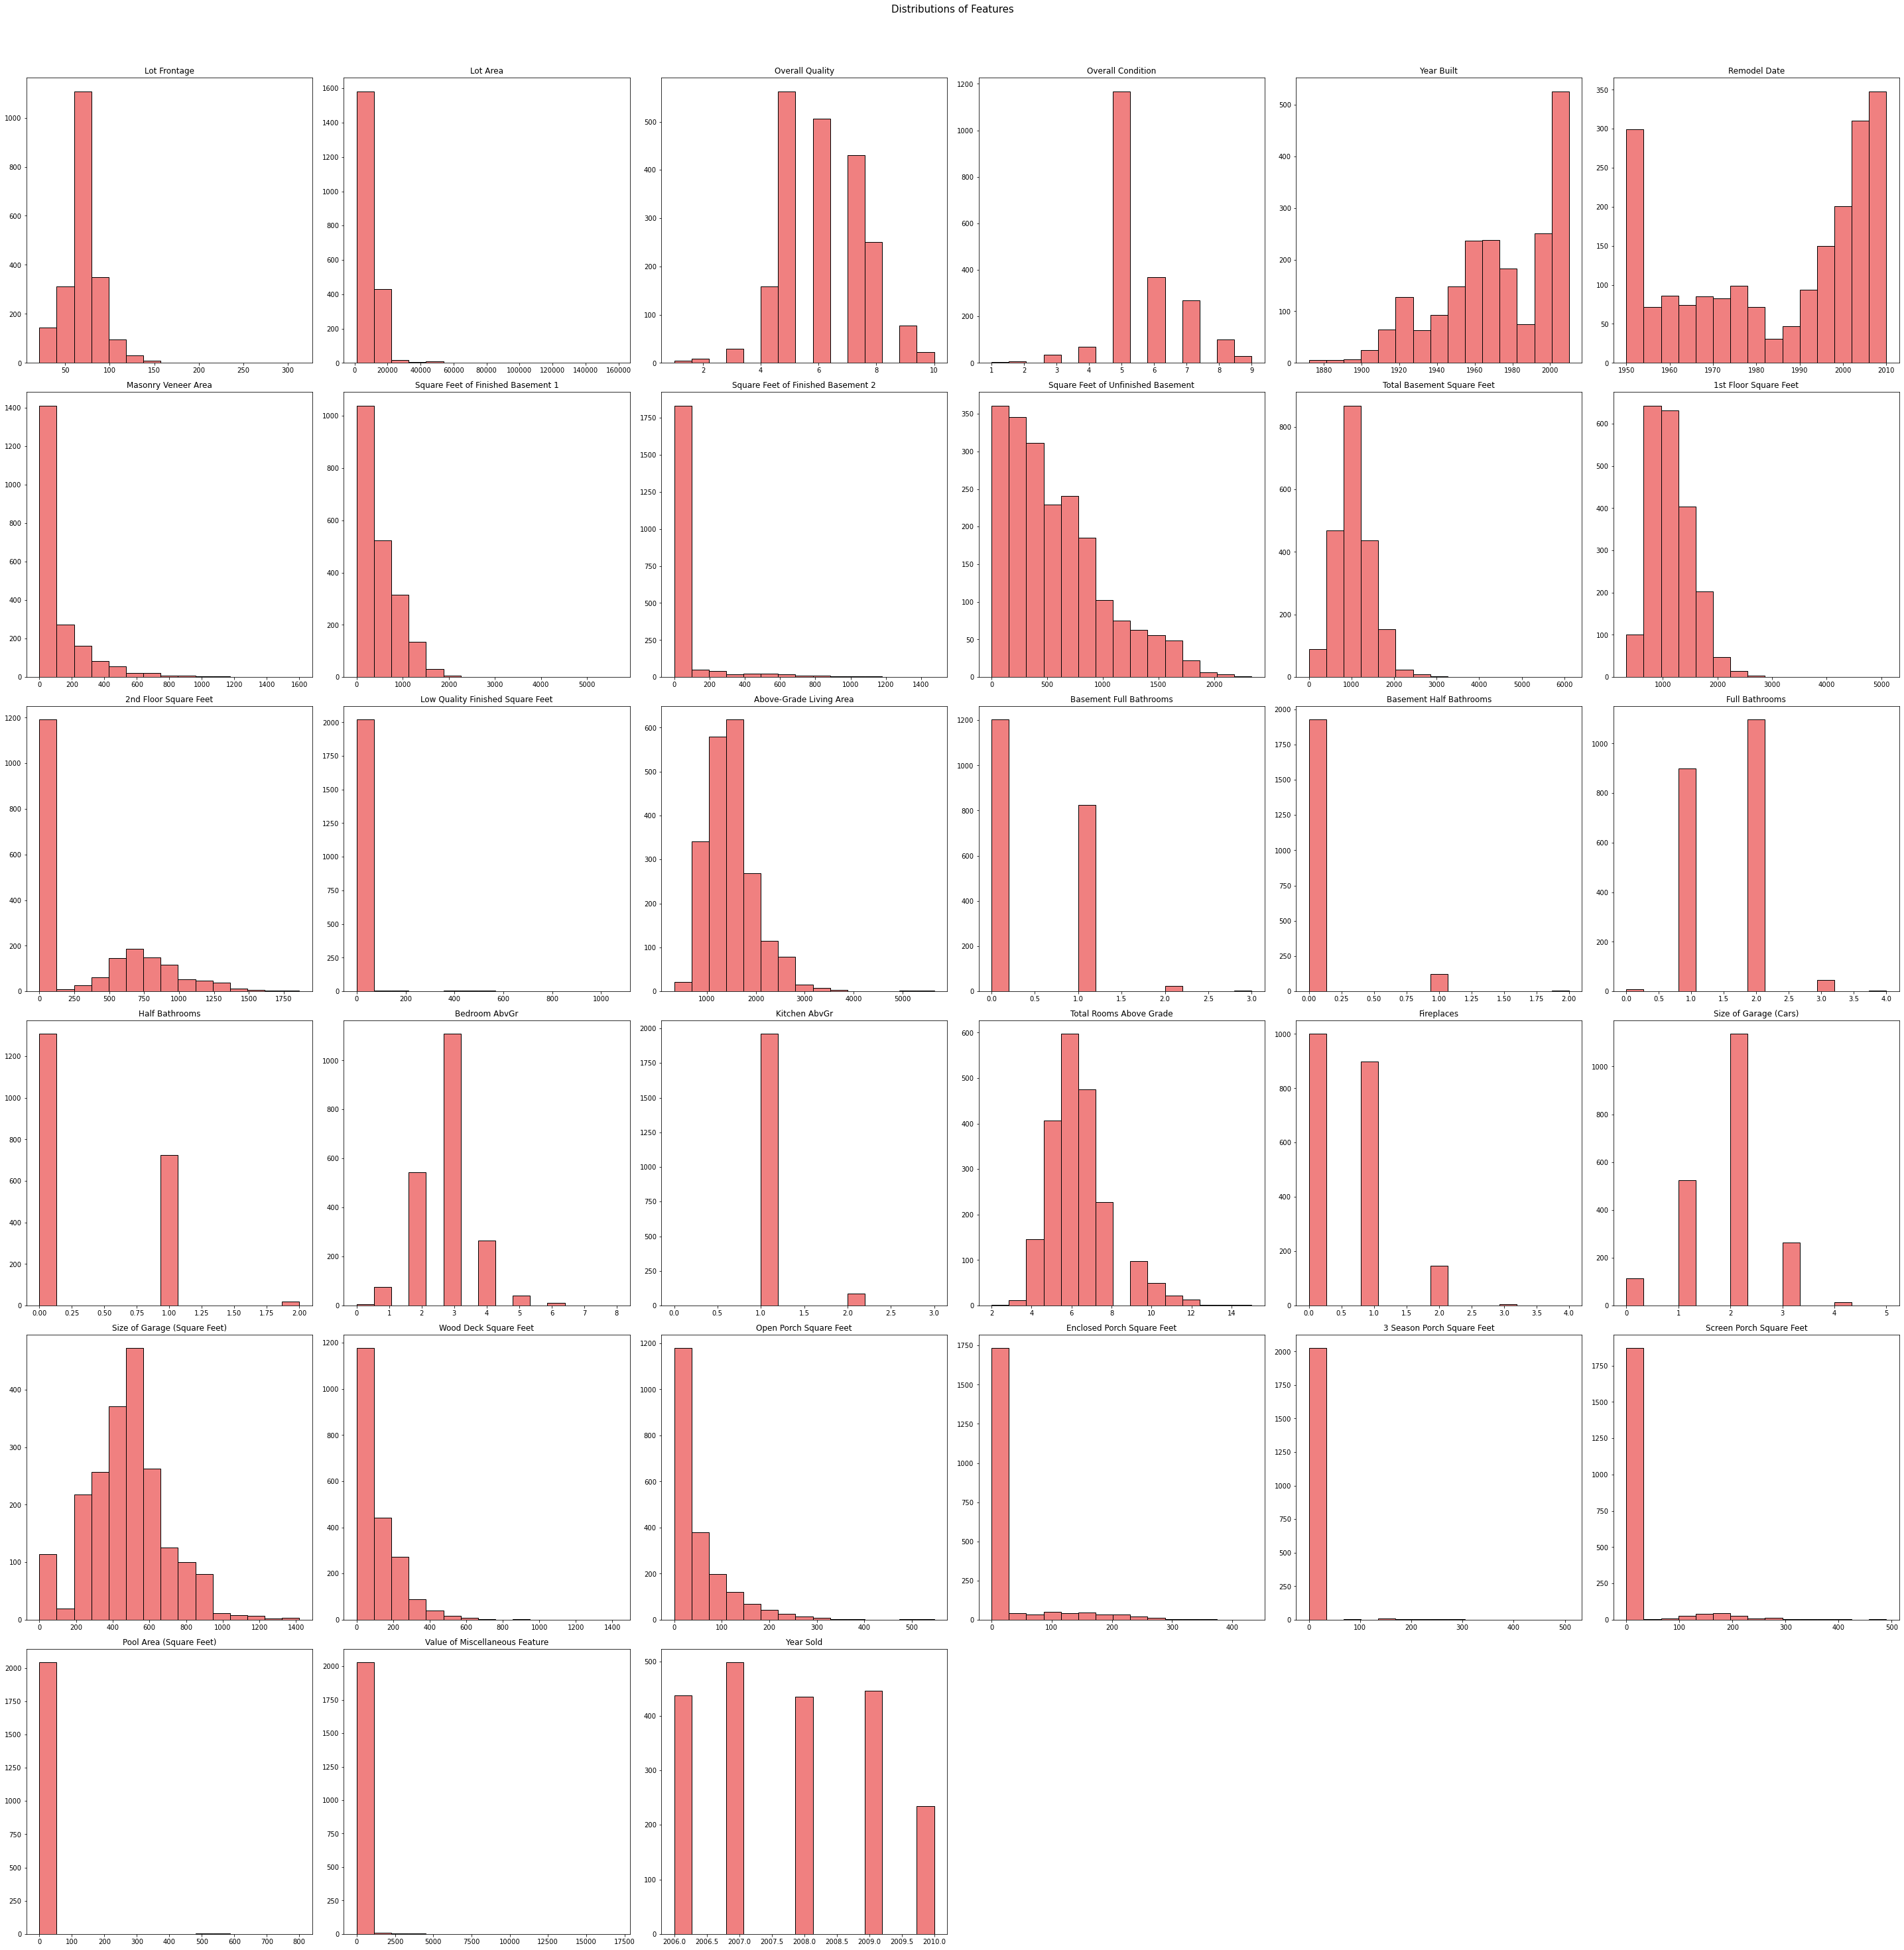

In [124]:
vis_df.drop(columns='Sale Price').hist(figsize=(40, 40), bins = 15, edgecolor = 'black', grid = False, color = 'lightcoral')
plt.suptitle('Distributions of Features', x = 0.5, y = 1.02, size = 15)
plt.tight_layout();

The above plots show the distributions for each variable. These plots were created as a quick visual to assess the normality of the data. As shown above, the distributions for the majority of numeric features do not appear to be normally distributed.

### Visualizing Relationships between Categorical Features and Sale Price

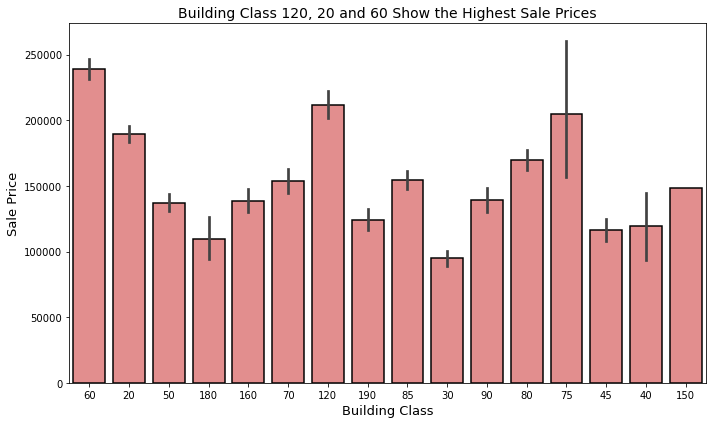

In [125]:
create_bar(train, 
          'MS SubClass', 
          'SalePrice', 
          title='Building Class 120, 20 and 60 Show the Highest Sale Prices', 
          x_label = 'Building Class', 
          y_label = 'Sale Price',
       )
plt.tight_layout()

In the above graph, Building Classes 120 (1-Story Planned Development Unit), 20 (1-Story 1946 and newer) and 60 (2-Story 1946 & Newer) result in significantly increased sale prices. These building classes might be important features for predicting the price of a building in Ames, Iowa.

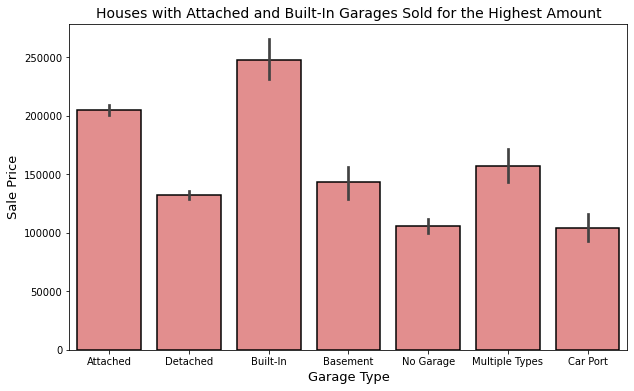

In [126]:
create_bar_xticks(train, 
                  'Garage Type', 
                  'SalePrice', 
                  title='Houses with Attached and Built-In Garages Sold for the Highest Amount', 
                  x_label = 'Garage Type', 
                  y_label = 'Sale Price', 
                  x_tick_labels =['Attached', 'Detached', 'Built-In', 'Basement', 'No Garage', 'Multiple Types', 'Car Port'])

Based on the above graph, houses with built-in garages had the highest sale prices. 

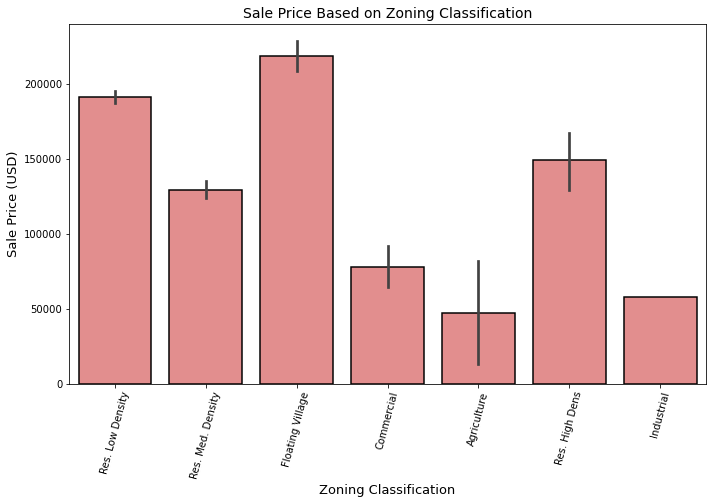

In [127]:
create_bar_xticks(train, 
           'MS Zoning', 
           'SalePrice', 
            title='Sale Price Based on Zoning Classification', 
            x_label = 'Zoning Classification',
            y_label = 'Sale Price (USD)',
            x_tick_labels = ['Res. Low Density', 'Res. Med. Density', 'Floating Village', 'Commercial', 'Agriculture', 'Res. High Dens', 'Industrial'])
plt.tight_layout()
plt.xticks(rotation = 75);




Based on the above graph, zoning classification appears to result in vastly difference in sale price. Properties from Res. Low Density, Floating Villages, and Res. High Density areas could be used in predicting price.

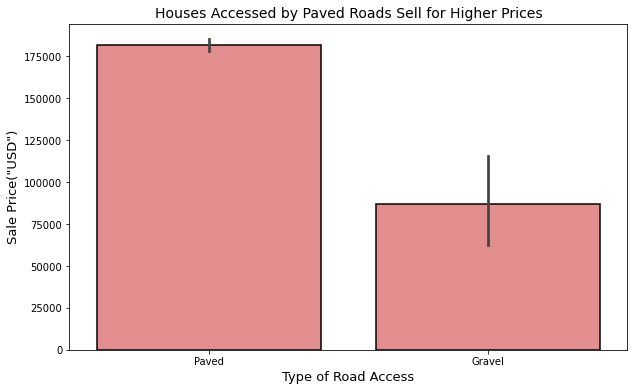

In [128]:
create_bar_xticks(train, 
           'Street', 
           'SalePrice', 
            title='Houses Accessed by Paved Roads Sell for Higher Prices', 
            x_label = 'Type of Road Access',
            y_label = 'Sale Price("USD")',
            x_tick_labels = ['Paved', 'Gravel'])

Based on the above graph, accessing to the property via a paved road leads to higher price than accessing the property via a gravel road.

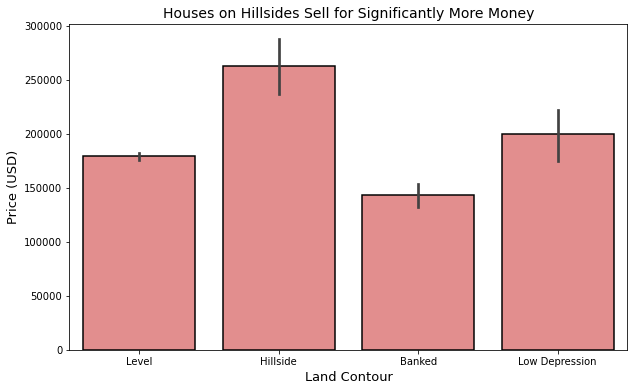

In [129]:
create_bar_xticks(train, 
           'Land Contour', 
           'SalePrice', 
            title='Houses on Hillsides Sell for Significantly More Money', 
            x_label = 'Land Contour',
            y_label = 'Price (USD)',
            x_tick_labels = ['Level', 'Hillside', 'Banked', 'Low Depression'])

From the above graph, houses on the hillside sell for the most money, while houses that are banked sell or the least amount of money. 

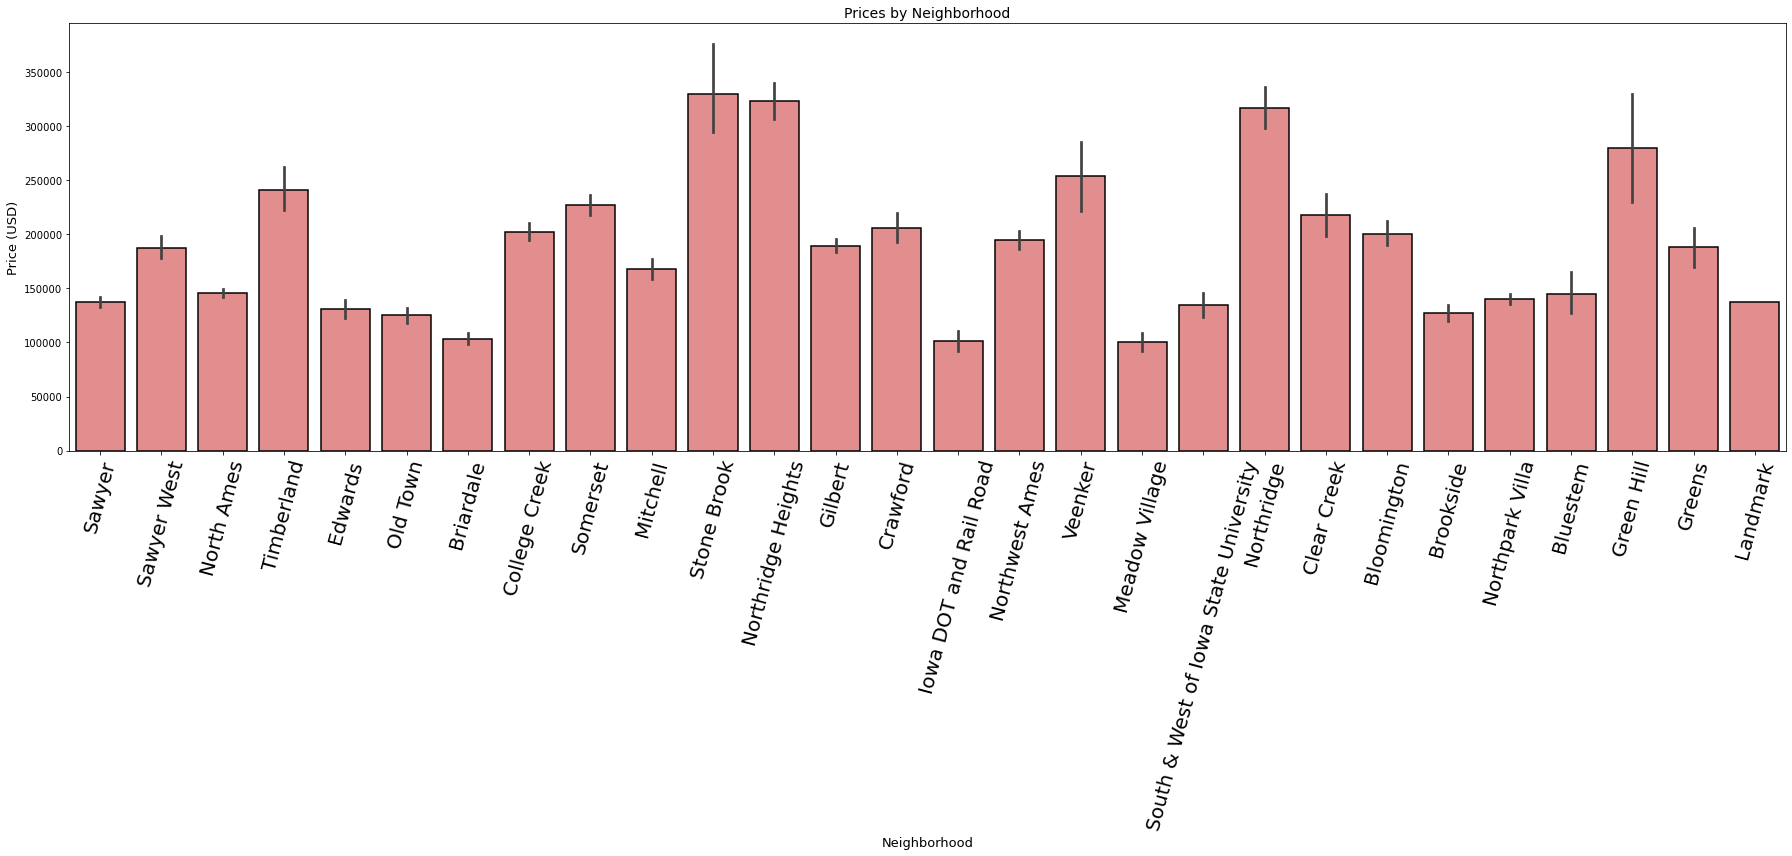

In [130]:
create_bar_xticks(train, 
           'Neighborhood', 
           'SalePrice', 
            title='Prices by Neighborhood', 
            x_label = 'Neighborhood',
            y_label = 'Price (USD)',
          plot_size = (25,12),
            x_tick_labels = ['Sawyer', 'Sawyer West', 'North Ames', 'Timberland', 'Edwards', 'Old Town', 'Briardale', 'College Creek', 'Somerset', 'Mitchell', 'Stone Brook', 'Northridge Heights', 'Gilbert', 'Crawford', 'Iowa DOT and Rail Road', 'Northwest Ames', 'Veenker', 'Meadow Village', 'South & West of Iowa State University', 'Northridge', 'Clear Creek', 'Bloomington', 'Brookside', 'Northpark Villa', 'Bluestem', 'Green Hill', 'Greens', 'Landmark'])
plt.xticks(size=20, rotation = 75)
plt.tight_layout();

Based on the above graph, neighborhood definitely seems to impact the price of a property. 

* Group 1 - Stone Brook, Northridge Heights, Veenker, Northridge, Green Hill
* Group 2 - Sawyer West, Timber, College Creek, Somerset, Gilbert, Crawford, Northwest Ames, Cleark Creek, Bloomington, Greens
* Group 3 - All Others

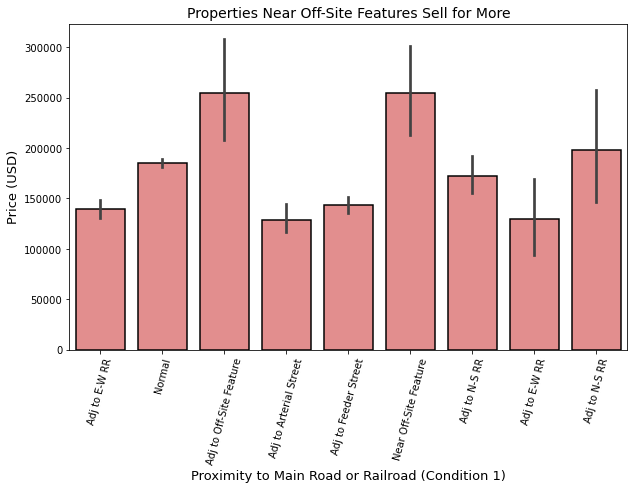

In [131]:
create_bar_xticks(train, 
           'Condition 1', 
           'SalePrice', 
            title='Properties Near Off-Site Features Sell for More', 
            x_label = 'Proximity to Main Road or Railroad (Condition 1)',
            y_label = 'Price (USD)',
            x_tick_labels = ['Adj to E-W RR', 'Normal', 'Adj to Off-Site Feature', 'Adj to Arterial Street', 'Adj to Feeder Street', 'Near Off-Site Feature', 'Adj to N-S RR', 'Adj to E-W RR', ' Adj to N-S RR'],
            )
plt.xticks(rotation = 75);


From the above graph, we are able to see that the properties have a potential higher sale price if they are near a adj off-site feature. Likewise,the properties have a potential lower sale prices if the property is near adj to arterial street. 


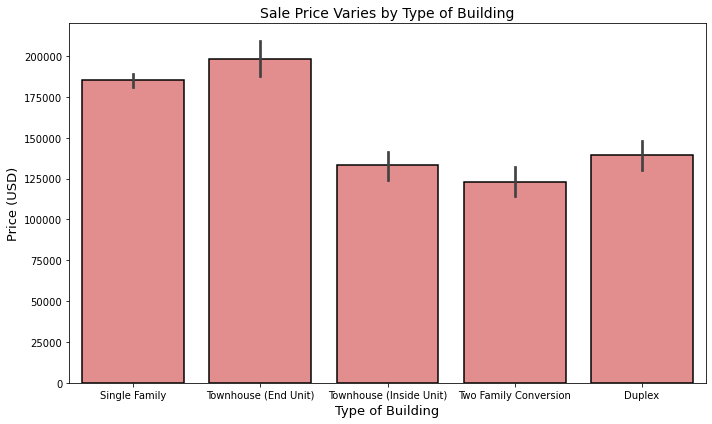

In [132]:
create_bar_xticks(train, 
           'Bldg Type', 
           'SalePrice', 
            title='Sale Price Varies by Type of Building', 
            x_label = 'Type of Building',
            y_label = 'Price (USD)',
            x_tick_labels = ['Single Family', 'Townhouse (End Unit)', 'Townhouse (Inside Unit)', 'Two Family Conversion', 'Duplex'])
plt.tight_layout()

Based on the above graph, we can conclude that townhouse (End unit) has the highest sale price.

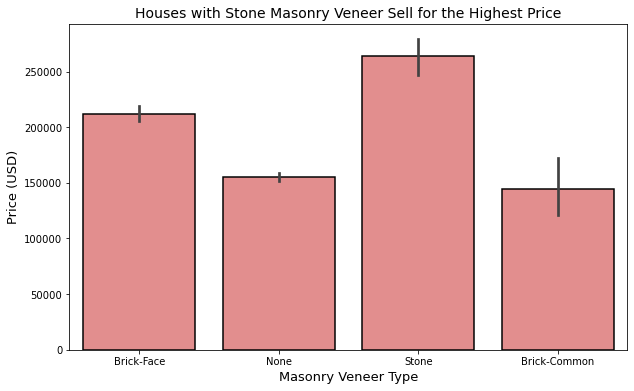

In [133]:
create_bar_xticks(train, 
           'Mas Vnr Type', 
           'SalePrice', 
            title='Houses with Stone Masonry Veneer Sell for the Highest Price', 
            x_label = 'Masonry Veneer Type',
            y_label = 'Price (USD)',
          x_tick_labels = ['Brick-Face', 'None', 'Stone', 'Brick-Common'])

Based on the above graph, houses with stone veneers are able to sell for higher price.

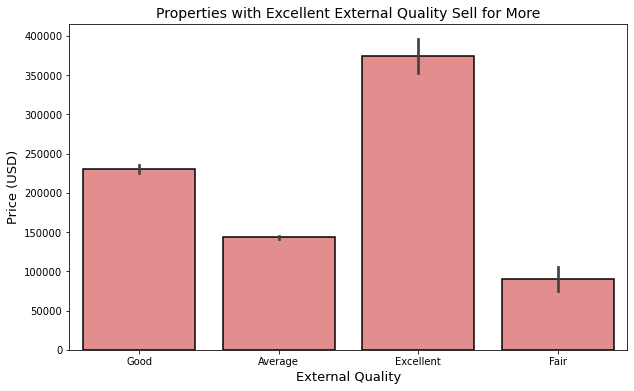

In [134]:
create_bar_xticks(train, 
           'Exter Qual', 
           'SalePrice', 
            title='Properties with Excellent External Quality Sell for More', 
            x_label = 'External Quality',
            y_label = 'Price (USD)',
            x_tick_labels = ['Good', 'Average', 'Excellent', 'Fair']
          )

Based on the above graph, it shows that the quality of the materials on the exterior of the house impacts price. Houses with excellent quality are able to sell for higher price.

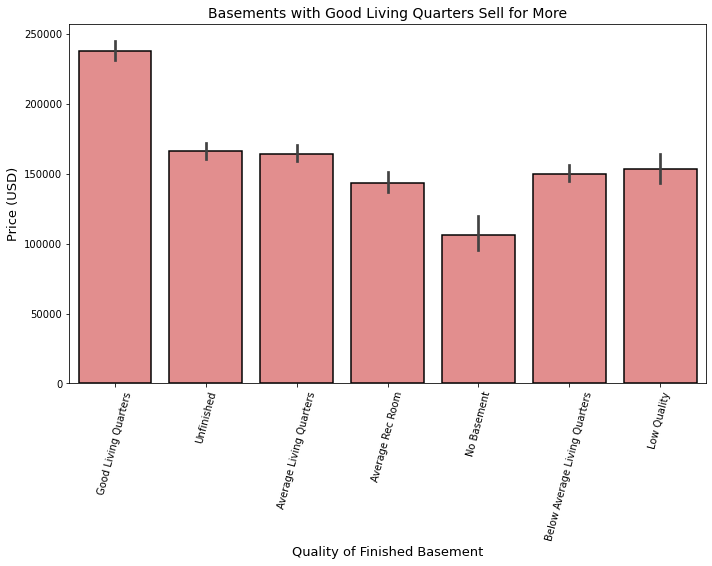

In [135]:
create_bar_xticks(train, 
           'BsmtFin Type 1', 
           'SalePrice', 
            title='Basements with Good Living Quarters Sell for More', 
            x_label = 'Quality of Finished Basement',
            y_label = 'Price (USD)',
            x_tick_labels = ['Good Living Quarters', 'Unfinished', 'Average Living Quarters', 'Average Rec Room', 'No Basement', 'Below Average Living Quarters', 'Low Quality'])
plt.tight_layout();
plt.xticks(rotation=75);

Based on the above graph, we can conclude that houses with good living quarters can sell for the highest price.

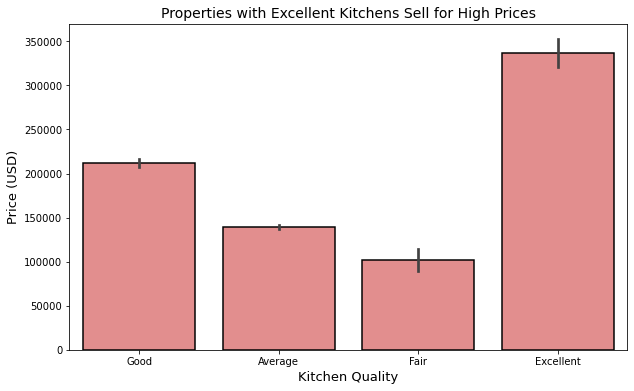

In [136]:
create_bar_xticks(train, 
           'Kitchen Qual', 
           'SalePrice', 
            title='Properties with Excellent Kitchens Sell for High Prices', 
            x_label = 'Kitchen Quality',
            y_label = 'Price (USD)',
            x_tick_labels = ['Good', 'Average', 'Fair', 'Excellent'])

Based on the above graph, we can conclude that houses with excellent quality kitchens can sell for the highest price. 

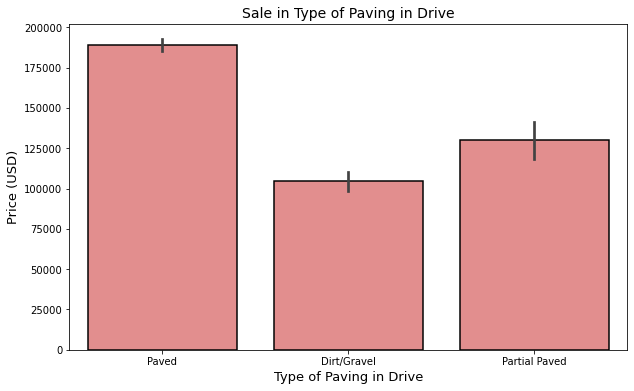

In [137]:
create_bar_xticks(train, 
           'Paved Drive', 
           'SalePrice', 
            title='Sale in Type of Paving in Drive', 
            x_label = 'Type of Paving in Drive',
            y_label = 'Price (USD)',
            x_tick_labels = ['Paved', 'Dirt/Gravel', 'Partial Paved'])

Based on this graph, we can conclude that houses with paved access can sell for the highest price. 

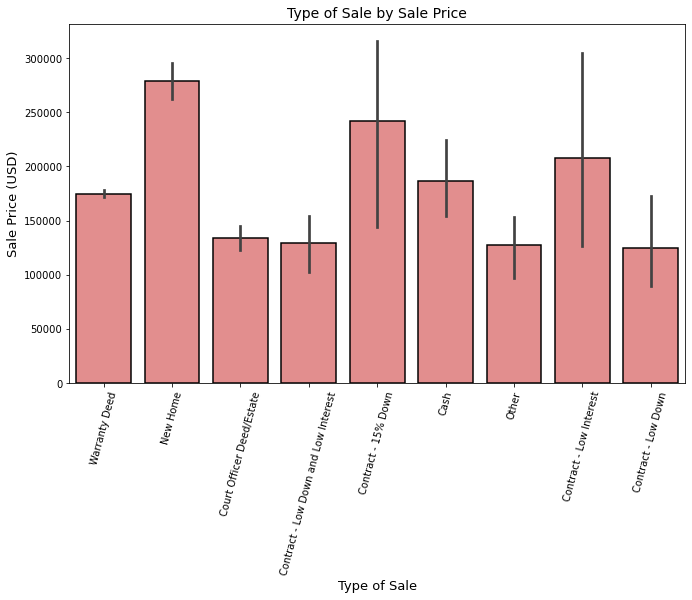

In [138]:
create_bar_xticks(train, 
           'Sale Type', 
           'SalePrice', 
            title='Type of Sale by Sale Price', 
            x_label = 'Type of Sale',
            y_label = 'Sale Price (USD)',
            x_tick_labels = ['Warranty Deed', 'New Home', 'Court Officer Deed/Estate', 'Contract - Low Down and Low Interest','Contract - 15% Down', 'Cash', 'Other', 'Contract - Low Interest', 'Contract - Low Down'])
plt.tight_layout()
plt.xticks(rotation = 75);

Based on the above graph, New Homes have the highest sale price.

# Feature Engineering

### Combine Train + Test Datasets to Ensure Equal Features in Train / Test Datasets

In [139]:
train_index_marker = len(train)
train_and_test = pd.concat(objs=[train, test], axis = 0)
train_and_test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,March,2010,WD,130500.0
1,544,531379050,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,April,2009,WD,220000.0
2,153,535304180,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,January,2010,WD,109000.0


### Functions

In [140]:
def create_total_baths(df):
    df['total_baths'] = df['Full Bath'] + df['Bsmt Full Bath'] + 0.5 * (df['Bsmt Half Bath'] + df['Half Bath'])

In [141]:
def drop_baths_columns(df):
    '''
    Drops columns used to create "Total Baths" feature
    '''
    df.drop(columns = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Full Bath'], inplace = True)

In [142]:
def create_liveable_sf(df):
    df['liveable_sf'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Gr Liv Area']

In [143]:
def drop_liveable_sf_columns(df):
    '''
    Drops all columns directly related to "Liveable SF" feature
    '''
    df.drop(columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF'], inplace = True)

### Create Features

#### Create a feature for total number of baths per home

In [144]:
create_total_baths(train_and_test)

In [145]:
drop_baths_columns(train_and_test)

#### Create a feature for total livable sq feet in the house

In [146]:
create_liveable_sf(train_and_test)

In [147]:
drop_liveable_sf_columns(train_and_test)

#### Explore if a 'Garage' Feature Can Be Built

In [148]:
train_and_test.columns[train_and_test.columns.str.contains('Garage')]

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [149]:
# Correlation of Garage Area with Sale Price (Train Data Only)
train.corr()['Garage Area']['SalePrice']

0.6498968496618986

In [150]:
# Correlation of Garage Cars with Sale Price (Train Data Only)
train.corr()['Garage Cars']['SalePrice']

0.6477813459587393

In [151]:
# Correlation between Garage Area and Garage Cars
train.corr()['Garage Area']['Garage Cars']

0.8934415694476643

Because the area of the garage and the number of cars that a garage can fit are highly correlated, I will create an interaction feature to account for this relationship.

In [152]:
train['garage_area_car_int'] = train['Garage Area'] * train['Garage Cars']

Because the interaction feature is more highly correlated than 'Garage Area' and 'Garage Cars' features, I will also add this feature to our full dataset. 

In [153]:
train_and_test['garage_area_car_int'] = train_and_test['Garage Area'] * train_and_test['Garage Cars']

#### Create Two Neighborhood Features Based on Clusters from Bar Plot

Based on the bar graph of Price by Neighborhood, there are three clusters of neighborhoods with sale prices that were in a similar range. To eliminate adding a dummy variable for each individual neighborhood, I will create two dummy variables to encode inclusion in these clusters. 

In [154]:
group1 = ['StoneBr', 'NridgeHt', 'Veenker', 'NoRidge', 'GrnHill']
group2 = ['SawyerW', 'CollgCr', 'Somerst', 'Gilbert', 'Crawfor', 'NAmes', 'ClearCr', 'Blmngtn', 'Greens']

train_and_test['neighborhoods_1'] = train_and_test['Neighborhood'].map(lambda name: 1 if name in group1 else 0)
train_and_test['neighborhoods_2'] = train_and_test['Neighborhood'].map(lambda name: 1 if name in group2 else 0)

In [155]:
train_and_test.drop(columns = 'Neighborhood', inplace = True)

#### Create Three Building Class Features

Based on the bar graph of building class, three building classes (120, 20 and 60) seemed to be distinguishing features. Hence, I have engineered features to be able to include these classes in the model without dummifying the entire set. 

In [156]:
train_and_test['SubClass20'] = train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 20 else 0)
train_and_test['SubClass60'] = train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 60 else 0)
train_and_test['SubClass120'] = train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 120 else 0)

In [157]:
train_and_test.drop(columns = 'MS SubClass', inplace = True)

#### Create a feature to represent if a property is close to an off-site feature or an arterial or feeder street

During EDA, I have observed that proximity to a positive off-site feature or proximity to a busy street seemed to distinguishing categories for Sale Price.

In [158]:
train_and_test['close_to_offsite_feature'] = train_and_test['Condition 1'].map(lambda x: 1 if x in ['PosN', 'PosA'] else 0)

In [159]:
train_and_test['close_to_busy_street'] = train_and_test['Condition 1'].map(lambda x: 1 if x in ['Artery', 'Feedr'] else 0)

In [160]:
train_and_test.drop(columns = 'Condition 1', inplace = True)

#### Create a feature to determine if masonry veneer type is stone

During EDA, stone masonry veneer types were found to be sold for higher price.

In [161]:
train_and_test['stone_veneer'] = train_and_test['Mas Vnr Type'].map(lambda x: 1 if x == 'Stone' else 0)

In [162]:
train_and_test.drop(columns = 'Mas Vnr Type', inplace = True)

#### Create a feature to code if the type of sale is for a new home

During EDA, new homes were found to be sold for higher price. Hence, a dummy variable will be created for this feature.

In [163]:
train_and_test['new_sale'] = train_and_test['Sale Type'].map(lambda x: 1 if x == 'New' else 0)

#### Create a feature to code if the sale is an estate transaction

During EDA, estate sales were found to be sold for lower price.

In [164]:
train_and_test['estate'] = train_and_test['Sale Type'].map(lambda x: 1 if x == 'COD' else 0)

In [165]:
train_and_test.drop(columns = 'Sale Type', inplace = True)

#### Create a feature to denote good living quarters in the basement

During EDA, homes with good basement living quarters were found to sell for higher price.

In [166]:
train_and_test['good_basement'] = train_and_test['BsmtFin Type 1'].map(lambda x: 1 if x == 'GLQ' else 0)

In [167]:
train_and_test.drop(columns = 'BsmtFin Type 1', inplace = True)

#### Create a feature to denote excellent or good kitchen quality

During EDA, homes with excellent kitchens were found to be sold for higher price.

In [168]:
train_and_test['excellent_kitchen'] = train_and_test['Kitchen Qual'].map(lambda x: 1 if x == 'Ex' else 0)

In [169]:
train_and_test.drop(columns = 'Kitchen Qual', inplace = True)

#### Create a column to denote zoning clusters

Floating Village - 'FV'

Res. Low Density - 'RL'

Res. High Density - 'RH' 

We will classify 'FV', 'RL' and 'RH' for the zoning classification in a cluster as they were found to be in the top 3 sale price in the zoning classification.

In [170]:
train_and_test['zoning_cluster_1'] = train_and_test['MS Zoning'].map(lambda x: 1 if x in ['FV', 'RL', 'RH'] else 0)

In [171]:
train_and_test.drop(columns = 'MS Zoning', inplace = True)

#### Create dummy variables for categorical features of interest identified in EDA

For the Ridge and Lasso Regression models, I have dummied all categorical variables that had not been coded into the model. For Linear Regression, I have selected features based on what I have found in the EDA and Lasso Regression. Hence, different dummy variables are required for the two model.

**Models 1-3** - Model with All Remaining Features Dummied (Used for Ridge and Lasso Regression)

In [172]:
# Drop features that have already been coded
dropped_cats = ['Id', 'PID', 'Kitchen Qual', 'BsmtFin Type 1', 'Sale Type', 'Mas Vnr Type', 'Condition 1', 'MS SubClass', 'Neighborhood', 'MS Zoning']

In [173]:
dummify_list_1 = [category for category in categorical_vars if category not in dropped_cats]

In [174]:
train_and_test_1 = pd.get_dummies(data = train_and_test, columns = dummify_list_1, drop_first = True)

**Model 4** - Linear Regression with Selected features

In [175]:
# Dummify selected features
dummify_list_4 = ['Street', 'Land Contour', 'Bldg Type', 'Garage Type', 'Exter Qual', 'Paved Drive']

In [176]:
train_and_test_4 = pd.get_dummies(data = train_and_test, columns = dummify_list_4, drop_first = True)

### Divide Data Back into Preprocessed Train and Test Sets

#### Models 1-3: Ridge and Lasso Regression

In [177]:
# Split into Train
train_preprocessed_1 = train_and_test_1[:train_index_marker]

In [178]:
# Split into Test
test_preprocessed_1 = train_and_test_1[train_index_marker:]

#### Model 4: Linear Regression with selected Features

In [179]:
# Split into Train
train_preprocessed_4 = train_and_test_4[:train_index_marker]

In [180]:
# Split into Test
test_preprocessed_4 = train_and_test_4[train_index_marker:]

## Model Preparation

### Models 1-3: Overfit Linear Regression, Ridge, and Lasso Regression

In [181]:
X_1 = train_preprocessed_1.drop(columns = ['SalePrice', 'zoning_cluster_1']) # Drop Zoning Cluster - Was Created After Lasso
y_1 = train_preprocessed_1['SalePrice']

In [182]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 1234567)

In [183]:
X_holdout_1 = test_preprocessed_1.drop(columns = ['SalePrice', 'zoning_cluster_1'])

### Model 3: Linear Regression Using selected Features Identified by EDA and Lasso

In [184]:
cols_to_drop = ['Id', 'PID', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 2', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 2', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'SalePrice', 'Alley', 'Lot Shape','Foundation', 'Mo Sold', 'Low Qual Fin SF', 'Roof Matl']

X_4 = train_preprocessed_4.drop(columns = cols_to_drop)
y_4 = np.log(train_preprocessed_4['SalePrice']) 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.2, random_state = 42)
X_holdout_4 = test_preprocessed_4.drop(columns = cols_to_drop)

## Modeling

### Functions

In [185]:
def display_R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The train score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The test score for this model is {round(model.score(X_test, y_test),4)}.')

---
### Model 1: Overfit Linear Regression (As Precursor to Ridge and Lasso)

#### Instantiate and Fit Model

In [186]:
lr_prelim = LinearRegression()

In [187]:
lr_prelim.fit(X_train_1, y_train_1);

#### Evaluate R2 Score

In [188]:
display_R2_scores(lr_prelim, X_train_1, y_train_1, X_test_1, y_test_1)

The mean cross validation score for this model is 0.7221.
The train score for this model is 0.9455.
The test score for this model is 0.7625.


#### Thoughts on the Model

The Overfit Linear Regression was fit to the data. Hence, the model was highly overfit (train R2: 0.9455, test R2: 0.7625). As the model was overfitted, i will need to use Ridge Regression and Lasso Regression.

### Model 2: Ridge Regression

#### Scale the Data (Can also be used with LASSO)

In [189]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train_1)
Z_test = ss.transform(X_test_1)
scaled_holdout = ss.transform(X_holdout_1)

#### Instantiate and Fit the Model

In [190]:
ridge = Ridge(alpha = 1025) 
ridge = ridge.fit(Z_train, y_train_1)

#### Evaluate R2 Scores

In [191]:
display_R2_scores(ridge, Z_train, y_train_1, Z_test, y_test_1)

The mean cross validation score for this model is 0.844.
The train score for this model is 0.8976.
The test score for this model is 0.819.


#### Thoughts on the Model

Overall, this model did improve with the same data. (train R2 = 0.844, test R2 = 0.819). The model is slightly  overfit. Additionally, there are some differences in the mean cross validation score between Ridge regression model and regression model.

---
### Model 3: Lasso Regression

#### Instantiate and Fit the Model

In [192]:
lasso = Lasso(alpha = 5000, max_iter = 4000)
lasso.fit(Z_train, y_train_1);

#### Evaluate R2 Scores

In [193]:
display_R2_scores(lasso, Z_train, y_train_1, Z_test, y_test_1)
print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')

The mean cross validation score for this model is 0.8074.
The train score for this model is 0.8458.
The test score for this model is 0.8079.
The number of features in this model is : 20.


#### Look at Coefficients that Remain in Model

In [194]:
lasso_coef = pd.DataFrame(lasso.coef_, X_train_1.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [195]:

lasso_coef[lasso_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False)

,Coefficient
Overall Qual,23598.855344
liveable_sf,19313.652184
garage_area_car_int,10662.485581
excellent_kitchen,8712.010478
Total Bsmt SF,3806.161331
Year Remod/Add,3748.958049
TotRms AbvGrd,2653.886403
Mas Vnr Area,2639.536991
neighborhoods_1,2376.214737
new_sale,2273.308235


#### Thoughts on the Model

To ensure that there is an optimal balance of bias and variance. We will reduce the number of features in the model to just 20. The train R2 shows 84.58% of variation in Sale Price and Test R2 shows 80.8% of the variation in sale price.





### Model 4: Linear Regression with Features Identified in EDA and Lasso

#### Instantiate and Fit Model

In [196]:
lr = LinearRegression()

In [197]:
lr.fit(X_train_4, y_train_4);

#### Evaluate R2 Scores

In [198]:
display_R2_scores(lr, X_train_4, y_train_4, X_test_4, y_test_4)
print(f'The number of features in this model is : {np.sum(lr.coef_ != 0)}.')

The mean cross validation score for this model is 0.8448.
The train score for this model is 0.8745.
The test score for this model is 0.8783.
The number of features in this model is : 45.


#### Find out number of colums and number of coefficient.

In [201]:
len(lr.coef_)

47

In [203]:
len(X_train_1.columns)

337

#### Look at Coefficients that Remain in Model

In [204]:
lr_coef = pd.DataFrame(lr.coef_, X_train_4.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [205]:
lr_coef[lr_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False)

,Coefficient
Street_Pave,1.798789e-01
Land Contour_HLS,1.554460e-01
Paved Drive_Y,1.018683e-01
Garage Type_Attchd,8.797049e-02
Garage Type_Basment,8.692382e-02
excellent_kitchen,8.376382e-02
Garage Type_BuiltIn,8.083828e-02
Overall Qual,7.869997e-02
neighborhoods_1,7.366271e-02
Paved Drive_P,7.198664e-02


#### Thoughts on the Model

Compared to the rest of the models created, this model performs the best in terms of R2 score. There is a low bias and low variance. With only 47 features, this model explains approximately 87% of the variation in the target (Sale Price) for both the train and test sets.

## Model Selection

Model Name | Train Score | Test Score
-|-|-
Linear Regression (Overfit)|94.6%|74.9%
Ridge|89.8%|81.9%
LASSO|84.6%|80.8%
Linear Regression (Features from EDA and LASSO)|87.5%|87.8%

Based on the models built in the above table, the Linear Regression that was built performed the best in terms of R2 score and it was also not overfit.  


## Model Evaluation

I will have to evaluate the Linear Regression model by calculating the Root Mean Squared Error and by examining the residuals. In order to increase interpretability, the logged y-values will be exponentiated for model evaluation. 

### Root Mean Squared Error (RMSE)

In [ ]:
# Convert back to actual (non-log) values
y_test = np.exp(y_test_4)

# Convert back to actual (non-log) values
y_pred = np.exp(lr.predict(X_test_4)) # Convert back to actual (non-log) values
resids = y_test - y_pred

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The RMSE is {round(rmse,2)}.')

Based on the RMSE value, the squared difference predictions for sale price made by the Linear Regression model are likely off by about $23,625.19. 

### How do the predictions of Sale Price compare to the actual values?

In [ ]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = y_pred, color = 'lightcoral')
plt.title('Comparison of Actual Price to Predicted Price', fontdict = {'fontsize':15})
maxDist = max(max(y_pred), max(y_test)) 
minDist = min(min(y_pred), min(y_test)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) 
plt.xlabel('Actual Price (y)', fontdict= {'fontsize':13})
plt.ylabel('Predicted Price (y_hat)', fontdict= {'fontsize':13})
plt.tight_layout();

Based on the above plot, this model does not perform equally well at predicting all prices. However, the model is good at predicting the price that falls within the range of \\$80,000  to  \\$230,000. The model does not perform well at extreme value due to insufficient train data.

### How do the residuals plot and distribution of residuals look?

#### Residuals Plot

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_pred, y = resids, color = 'lightcoral')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuals Plot', fontdict = {'fontsize':15})
plt.xlabel('Predicted Values (y_hat)', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})
plt.tight_layout();

The residuals plot shows the poor performance of predicting values less than \\$80,000  and greater than  \\$230,000. The residuals increase at the more extreme predicted values. The residuals plot indicates that this model did not have equality of variance between features. 

#### Distribution of Residuals

In [ ]:
# Plot Graph 3
resids.hist(bins = 20, figsize = (9,6), edgecolor = 'black', grid = False, color = 'lightcoral')
plt.title('Distribution of Residuals', fontdict = {'fontsize':15})
plt.xlabel('Residuals', fontdict = {'fontsize':13})
plt.ylabel('Frequency', fontdict = {'fontsize':13})
plt.tight_layout();

Based on the above histogram, it shows that the residuals are not normally distributed. On both tails of the distribution, there are some residuals that indicate that the model's prediction was incorrect.

#### Coefficients

In [ ]:
# Calculate coefficients when target has been logged

lr_coefs = pd.DataFrame((np.exp(lr.coef_)-1)*100, X_train_4.columns, columns = ['Coefficient'])

In [ ]:
X_train_4.columns

## Conclusions

In [208]:
lr_coef = pd.DataFrame(lr.coef_, X_train_4.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [209]:
lr_coef[lr_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False)

,Coefficient
Street_Pave,1.798789e-01
Land Contour_HLS,1.554460e-01
Paved Drive_Y,1.018683e-01
Garage Type_Attchd,8.797049e-02
Garage Type_Basment,8.692382e-02
excellent_kitchen,8.376382e-02
Garage Type_BuiltIn,8.083828e-02
Overall Qual,7.869997e-02
neighborhoods_1,7.366271e-02
Paved Drive_P,7.198664e-02


Based on the chosen model's coefficients, we can interpret that:

1. Street Pave, Land Contour and Pave Drive increases the sale price by 17.98%, 15.54% and 10.18% respectively.
2.Bldg Type Duplex, Bldg Type Twins and External Quality decreases the sale price by 8.45%, 12.01% and 18.18%.

Currently, the model is useful in picking neighbourhoods such as Street Pave, Land Contour and Pave Drive that will increase in sale price. We can avoid places that have Bldg Type Duplex, Bldg Type Twin and External Quality as it leads to a decease in sale price. 

The Linear Regression model is able to explain approximately 87% of the variation in the target (Sale Price) for both the train and test sets. On top of that, it's able to predict the sale price within $23,625.19. The model is good at predicting the price that falls within the range of \\$80,000 to \\$230,000. There are several flaws in this method which includes small sample size and free market. Modelling housing market is complex and should require more than six years. The small sample size is biased toward the events after the housing crisis and is not representative of long-term trends in the housing. 

The price of housing, like the price of any good or service in a free market, is driven by the law of supply and demand. When demand increases or supply decreases, prices go up. In the absence of some natural disaster, which can decrease the immediate supply of homes, prices rise when demand tends to outpace supply trends. The supply of housing can also be slow to react to increases in demand because it takes a long time to build or fix up a house, and in highly developed areas there simply isn't any more land to build on. So, if there is a sudden or prolonged increase in demand, prices are sure to rise.



## Recommendations 

An above-average rise in housing prices is initially driven by a demand shock. There are several possibilities that leads to the increase in demands:

- A rise in general economic activity and increased prosperity that puts more disposable income in consumers' pockets and encourages homeownership
- An increase in the population or the demographic segment of the population entering the housing market
- A low, general level of interest rates, particularly short-term interest rates, that makes homes more affordable
- Easy access to credit—often with lower underwriting standards—that also brings more buyers to the market

Each of these variables can combine with one another to cause a housing market bubble to take off. Indeed, these factors tend to feed off of each other. We simply point out that in general, like all bubbles, an uptick in activity and prices precedes excessive risk-taking and speculative behavior by all market participants—buyers, borrowers, lenders, builders, and investors.

Hence, it is not fair to assume that we can predict the property price without considering the other major economic possibilities that can affect the price.

Based on the linear regression coefficient, it will make sense that we include dataset such as the short-term interest rates and the consumers' income and age group to better improve the model. On top of that, we can include the data which have at least two financial crisis so that it will better predict the price fairly.

## References

1. [Population of Ames Iowa](https://datausa.io/profile/geo/ames-ia/)
2. [Machine Learning in Real Estate](https://unionstreetmedia.com/the-rise-of-machine-learning-in-real-estate/#:~:text=Personalized%20Marketing%20Automation%20%E2%80%93%20machine%20learning,neighborhood%20and%20property%20is%20best)
3. [Ames Housing Data - Original Article](#http://jse.amstat.org/v19n3/decock.pdf)
4. [How To Interpret R-squared in Regression Analysis](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)
5. [Housing Bubble](https://www.investopedia.com/articles/07/housing_bubble.asp/)
